# Jungler Pathing in High Elo Games

Goal: finding which lane is most likely to be ganked by the most picked 20 champions


In [1]:
# def getAPI_key():
#    f = open("../api_key.txt", "r")
#    return f.read()

In [5]:
api_key = "RGAPI-8ccf1561-9a41-4bac-89e5-bd0e4ba6c924"

import random

import cassiopeia as cass

cass.set_riot_api_key(api_key)  # This overrides the value set in your configuration/settings.
#cass.set_riot_api_key(getAPI_key())
# summoner = cass.get_summoner(name="Playboy Carti", region="NA")
# print("{name} is a level {level} summoner on the {region} server.".format(name=summoner.name,
#                                                                           level=summoner.level,
#                                                                           region=summoner.region))

# champions = cass.get_champions(region="NA")
# random_champion = random.choice(champions)
# print("He enjoys playing champions such as {name}.".format(name=random_champion.name))

print("\n")

value = cass.get_match(4645309816, region = "NA")
for participant in value.participants:
    print(participant.champion.name)

print("\n")

for participant in value.participants:
    print(participant.individual_position.name)
    playerRole = participant.individual_position.name
    if (playerRole == "jungle"):
        




Making call: https://americas.api.riotgames.com/lol/match/v5/matches/NA1_4645309816
Fiora
Rengar
Zoe
Aphelios
Neeko
Kled
Lee Sin
Kennen
Twitch
Milio


top_lane
jungle
mid_lane
bot_lane
utility
top_lane
jungle
mid_lane
bot_lane
utility


teamID: 100 (Blue Team)
teamID: 200 (Red Team)

In [1]:
import pandas as pd


df = pd.read_csv('./datasets/leagueoflegends/combined_interpolated_data.csv')
df.head() #first 5 lines of csv

,MatchID,Time,Player1_X,Player1_Y,Player2_X,Player2_Y,Player3_X,Player3_Y,Player4_X,Player4_Y,...,Distance_6_8,Distance_6_9,Distance_6_10,Distance_7_8,Distance_7_9,Distance_7_10,Distance_8_9,Distance_8_10,Distance_9_10,Teamfight
0,NA1_4647454701,0,554.000000,581.000000,593.00,464.000000,557.000000,345.000000,458.000000,271.00,...,236.019067,324.524267,381.188930,124.326184,235.529191,323.402226,123.600162,234.648674,123.016259,0
1,NA1_4647454701,1,596.566667,751.083333,753.55,576.266667,663.883333,455.516667,594.266667,340.75,...,317.620765,398.464944,352.764776,114.265467,208.005594,212.190015,102.462882,161.464004,120.356600,0
2,NA1_4647454701,2,639.133333,921.166667,914.10,688.533333,770.766667,566.033333,730.533333,410.50,...,425.035137,538.710973,422.569696,133.519741,247.509813,144.642352,120.403636,88.876494,130.992536,0
3,NA1_4647454701,3,681.700000,1091.250000,1074.65,800.800000,877.650000,676.550000,866.800000,480.25,...,543.158128,706.839163,554.681424,172.539191,330.844892,179.664750,165.142908,23.349946,152.161099,0
4,NA1_4647454701,4,724.266667,1261.333333,1235.20,913.066667,984.533333,787.066667,1003.066667,550.00,...,666.318696,887.136169,715.375420,221.095796,433.425923,281.244804,220.961706,63.318174,180.187618,0


Find Unique Match ID:

In [2]:
uniqueMatchID = df.MatchID.unique()
print(uniqueMatchID)

['NA1_4647454701' 'NA1_4645483939' 'NA1_4598230327' 'NA1_4645309816'
 'NA1_4656152813' 'NA1_4638745154' 'NA1_4643089224' 'NA1_4615565612'
 'NA1_4657777097' 'NA1_4646681514' 'NA1_4645234515' 'NA1_4598324711'
 'NA1_4649185990' 'NA1_4648944767' 'NA1_4648052410' 'NA1_4648390957'
 'NA1_4646423955' 'NA1_4646491566' 'NA1_4644444434' 'NA1_4643993824'
 'NA1_4641811159' 'NA1_4640661873' 'NA1_4646705052' 'NA1_4646708615'
 'NA1_4654339825' 'NA1_4597474294' 'NA1_4641455049' 'NA1_4656960086'
 'NA1_4646675896' 'NA1_4647204793' 'NA1_4649132104' 'NA1_4599742776'
 'NA1_4647097967' 'NA1_4645727097' 'NA1_4646187313' 'NA1_4656769721'
 'NA1_4649341904' 'NA1_4644465188' 'NA1_4644122211' 'NA1_4643048817'
 'NA1_4596989546' 'NA1_4654406885' 'NA1_4644032493' 'NA1_4599447028'
 'NA1_4640560641' 'NA1_4644925727' 'NA1_4647372737' 'NA1_4645337633'
 'NA1_4644981295' 'NA1_4640502501' 'NA1_4643293822' 'NA1_4643019589'
 'NA1_4599696650' 'NA1_4647267754' 'NA1_4620465375' 'NA1_4645850487'
 'NA1_4627554999' 'NA1_4599996001'

In [8]:
player1 = df[df["MatchID"] == "NA1_4647454701"][["Player1_X","Player1_Y"]]
player2 = df[df["MatchID"] == "NA1_4647454701"][["Player2_X","Player2_Y"]]
print(player1)

         Player1_X     Player1_Y
0       554.000000    581.000000
1       596.566667    751.083333
2       639.133333    921.166667
3       681.700000   1091.250000
4       724.266667   1261.333333
...            ...           ...
2276  12559.000000  13028.400000
2277  12625.750000  13029.800000
2278  12692.500000  13031.200000
2279  12759.250000  13032.600000
2280  12826.000000  13034.000000

[2281 rows x 2 columns]


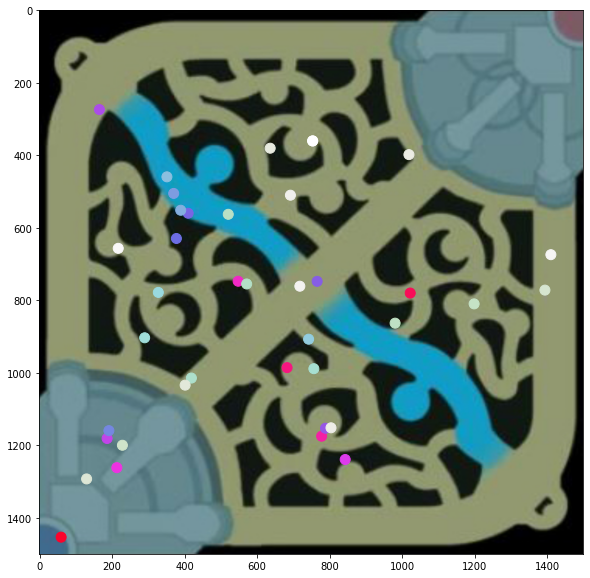

In [9]:

import cv2
import matplotlib.pyplot as plt
from colour import Color

red = Color("#fc032c")
img = cv2.imread("./images/summoners-rift2.jpg")
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rbgimgresized = cv2.resize(rgbimg, (1500, 1500))
player1_X = player1["Player1_X"].values/10
player1_X = player1_X[::60]
player1_Y = 1500 - (player1["Player1_Y"].values/10)
player1_Y = player1_Y[::60]
player2_X = player2["Player2_X"].values/10
player2_X = player2_X[::60]
player2_Y = 1500 - (player2["Player2_Y"].values/10)
player2_Y = player2_Y[::60]
plt.figure(figsize=(10,10))
plt.imshow(rbgimgresized)


colors = list(red.range_to(Color("#ffffff"), len(player1_X)))
colors = [i.rgb for i in colors]

#plt.scatter(player1_X, player1_Y, c = "b")
plt.scatter(player2_X, player2_Y, c = colors, s = 100)
